### Import Necessary Packages

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import math
from numpy import array
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### Importing Data

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


Looking at the date field above, we notice that we have data from May 2015 to May 2020

###### Let us now consider close column as the close column speicies the price that stock closed on that day.

In [4]:
df_close = df.reset_index()['close']
df_close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [5]:
df_close.shape

(1258,)

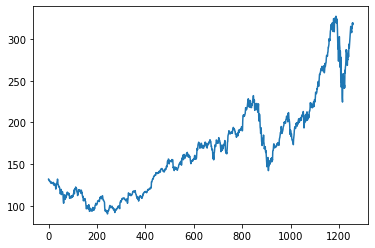

In [6]:
plt.plot(df_close)

### Data Preprocessing

##### Scaling the data between o and 1 using min max scaler

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

#### Splitting dataset into train and test split

In [8]:
training_size = int(len(df_close)*0.65)
test_size = len(df_close)-training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [9]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [10]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [13]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [14]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [15]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
print(X_train.shape), print(y_train.shape)

(716, 100, 1)
(716,)


(None, None)

In [17]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_test.shape), print(y_test.shape)

(340, 100, 1)
(340,)


(None, None)

In [18]:
X_train

array([[[0.17607447],
        [0.17495567],
        [0.16862282],
        ...,
        [0.09055982],
        [0.08388922],
        [0.09085536]],

       [[0.17495567],
        [0.16862282],
        [0.1696994 ],
        ...,
        [0.08388922],
        [0.09085536],
        [0.0873934 ]],

       [[0.16862282],
        [0.1696994 ],
        [0.16727181],
        ...,
        [0.09085536],
        [0.0873934 ],
        [0.09030651]],

       ...,

       [[0.34801148],
        [0.32930845],
        [0.32145571],
        ...,
        [0.50042219],
        [0.50413747],
        [0.5062062 ]],

       [[0.32930845],
        [0.32145571],
        [0.32694419],
        ...,
        [0.50413747],
        [0.5062062 ],
        [0.51920966]],

       [[0.32145571],
        [0.32694419],
        [0.32230009],
        ...,
        [0.5062062 ],
        [0.51920966],
        [0.53719497]]])

### Creating Stacked LSTM Model

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 153ms/step - loss: 0.0163 - val_loss: 0.0583
Epoch 2/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0034 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 1s 88ms/step - loss: 9.3926e-04 - val_loss: 0.0047
Epoch 4/100
12/12 [==============================] - 1s 87ms/step - loss: 8.1137e-04 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 1s 90ms/step - loss: 7.6973e-04 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 1s 90ms/step - loss: 6.3692e-04 - val_loss: 0.0053
Epoch 7/100
12/12 [==============================] - 1s 88ms/step - loss: 6.0696e-04 - val_loss: 0.0054
Epoch 8/100
12/12 [==============================] - 1s 90ms/step - loss: 6.4923e-04 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 5.8695e-04 - val_loss: 0.0043
Epoch 10/100
12/12 [==============================] - 1s 87ms/step - lo

12/12 [==============================] - 1s 92ms/step - loss: 2.2768e-04 - val_loss: 0.0023
Epoch 80/100
12/12 [==============================] - 1s 89ms/step - loss: 2.2095e-04 - val_loss: 0.0011
Epoch 81/100
12/12 [==============================] - 1s 89ms/step - loss: 1.8780e-04 - val_loss: 0.0011
Epoch 82/100
12/12 [==============================] - 1s 89ms/step - loss: 1.8819e-04 - val_loss: 0.0012
Epoch 83/100
12/12 [==============================] - 1s 90ms/step - loss: 1.6944e-04 - val_loss: 0.0014
Epoch 84/100
12/12 [==============================] - 1s 90ms/step - loss: 1.7355e-04 - val_loss: 0.0010
Epoch 85/100
12/12 [==============================] - 1s 90ms/step - loss: 2.0396e-04 - val_loss: 0.0023
Epoch 86/100
12/12 [==============================] - 1s 93ms/step - loss: 1.9190e-04 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 1s 89ms/step - loss: 2.0352e-04 - val_loss: 0.0011
Epoch 88/100
12/12 [==============================] - 1s 90ms/step -

##### Lets Do the prediction and check performance metrics

In [21]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

##### Transformback to original form

In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
train_predict

array([[111.88749 ],
       [111.779724],
       [111.691864],
       [111.92939 ],
       [112.451324],
       [113.31695 ],
       [114.80213 ],
       [116.08664 ],
       [116.70413 ],
       [117.27986 ],
       [118.10894 ],
       [118.93973 ],
       [119.810074],
       [120.78363 ],
       [121.61614 ],
       [121.99587 ],
       [121.93858 ],
       [121.52504 ],
       [120.40797 ],
       [118.80065 ],
       [117.10533 ],
       [115.245674],
       [113.769844],
       [112.84579 ],
       [112.95805 ],
       [114.11836 ],
       [115.93157 ],
       [117.61452 ],
       [118.89325 ],
       [119.50895 ],
       [119.47716 ],
       [119.08018 ],
       [118.4335  ],
       [117.59086 ],
       [116.59733 ],
       [116.17999 ],
       [116.31875 ],
       [116.81168 ],
       [117.057655],
       [117.007576],
       [116.344025],
       [115.18371 ],
       [113.62295 ],
       [112.14933 ],
       [110.7689  ],
       [109.266396],
       [107.97662 ],
       [107.0

##### Calculate RMSE performance metrics

In [24]:
math.sqrt(mean_squared_error(y_train,train_predict))

141.2669514795439

In [25]:
math.sqrt(mean_squared_error(y_test,test_predict))

234.08576087231054

### Plotting 

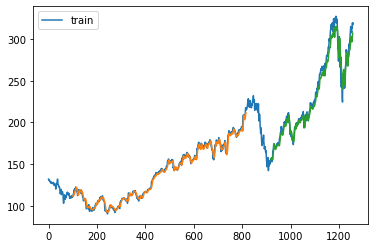

In [29]:


# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.legend(['train', 'test'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()